In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

2024-09-14 17:41:54.348879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load in the MNIST data
imgs_test, labels_test = mnist.load_data()[1]
print(imgs_test.shape)
print(labels_test.shape)

(10000, 28, 28)
(10000,)


In [3]:
# Flatten the test images
flattened = imgs_test.reshape(10**4, 28 * 28)
print(flattened.shape)

(10000, 784)


In [4]:
# Compute an SVD of the flattened test image matrix
U, S, V = np.linalg.svd(flattened, full_matrices=False)
print(U.shape)
print(S.shape)
print(V.shape)

(10000, 784)
(784,)
(784, 784)


In [5]:
# Project onto the space spanned by the first two right singular vectors
proj = flattened @ V[:2, :].T
print(proj.shape)

(10000, 2)


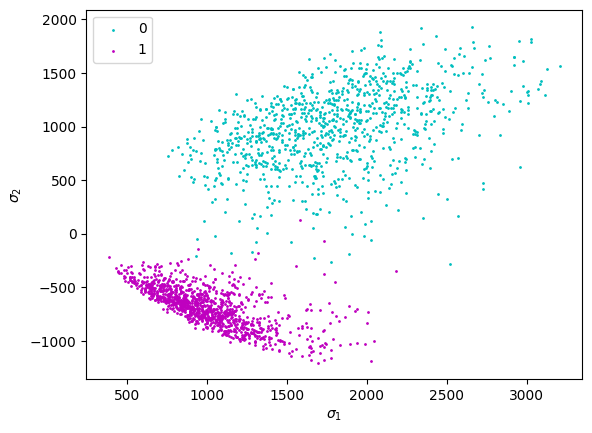

In [6]:
# Display points corresponding to 0 and 1 in different colors
def plot_2d_projections(labels, colors):
  for label, color in zip(labels, colors):
    proj_label = proj[labels_test == label]
    plt.scatter(proj_label[:, 0], proj_label[:, 1], s=1, c=color, label=label)

  plt.legend()
  plt.xlabel('$\sigma_1$')
  plt.ylabel('$\sigma_2$')
  plt.show()

plot_2d_projections([0, 1], ['c', 'm'])

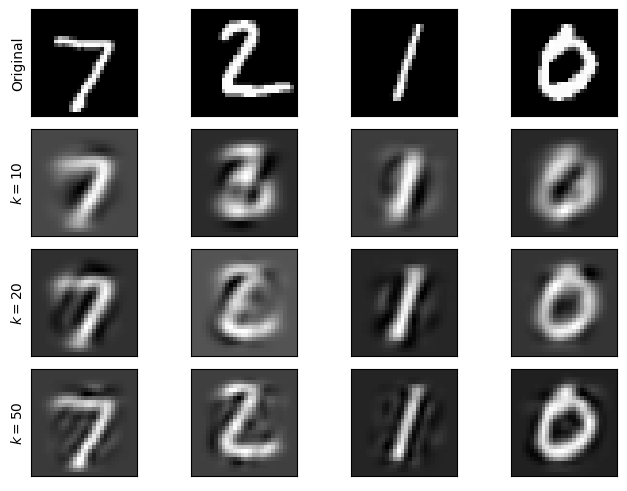

In [7]:
def approximation(k):
  return U[:, :k] @ np.diag(S[:k]) @ V[:k, :]

def plot_approximations(ks):
  fig, axs = plt.subplots(len(ks), 4, constrained_layout=True)
  plt.setp(axs, xticks=[], yticks=[])

  for i, k in enumerate(ks):
    if k == None:
      # Plot the original
      A_k = imgs_test
      axs[i, 0].set(ylabel='Original')
    else:
      # Plot the projections
      A_k = approximation(k).reshape(10**4, 28, 28)
      axs[i, 0].set(ylabel=f'$k={k}$')
    for j in range(4):
      axs[i, j].imshow(A_k[j], cmap='gray')
  plt.show()

# None denotes the original
plot_approximations([None, 10, 20, 50])